In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [13]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df.shape

(599, 64)

In [14]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.209077,0.494294,-4.358417e-07,0.283013,0.515607,-0.029916,0.344175,0.524508,-0.058789,0.376704,...,0.219452,0.438277,-0.100613,0.209725,0.442692,-0.104049,0.203805,0.402351,-0.107710,1
1,0.204186,0.492401,-4.514539e-07,0.276894,0.511163,-0.037346,0.338912,0.517702,-0.070410,0.373700,...,0.219059,0.411947,-0.103188,0.207248,0.430368,-0.105370,0.200352,0.395185,-0.106981,1
2,0.213327,0.492544,-4.344125e-07,0.285113,0.510551,-0.037325,0.346213,0.513936,-0.069004,0.380712,...,0.226234,0.424540,-0.096799,0.216626,0.438910,-0.100054,0.209424,0.403837,-0.102470,1
3,0.222521,0.489006,-3.891248e-07,0.296665,0.506369,-0.033187,0.357758,0.510351,-0.063082,0.383098,...,0.217299,0.447498,-0.106748,0.211923,0.454171,-0.108171,0.210991,0.411706,-0.109305,1
4,0.227665,0.494178,-3.129705e-07,0.302293,0.512005,-0.034062,0.363433,0.520834,-0.066312,0.384049,...,0.219057,0.467404,-0.115213,0.217903,0.473444,-0.115861,0.217759,0.432811,-0.116859,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,0.200783,0.910152,4.020791e-07,0.177169,0.849936,-0.008701,0.182696,0.789711,-0.017385,0.188314,...,0.338273,0.824089,-0.036235,0.360682,0.798657,-0.038640,0.378084,0.776581,-0.039933,5
595,0.188032,0.895754,3.450958e-07,0.167665,0.836602,-0.007306,0.174568,0.780173,-0.014869,0.179241,...,0.325438,0.819249,-0.034640,0.347165,0.795184,-0.036959,0.363365,0.774697,-0.038135,5
596,0.558155,0.897893,3.100475e-07,0.576367,0.831586,-0.016501,0.571209,0.765804,-0.025986,0.561998,...,0.429327,0.808947,-0.023932,0.409298,0.783474,-0.028310,0.392631,0.762542,-0.030718,5
597,0.559202,0.899069,2.970927e-07,0.576982,0.833224,-0.014849,0.570732,0.767783,-0.023710,0.561324,...,0.429307,0.810935,-0.023443,0.409176,0.786181,-0.027890,0.392325,0.764877,-0.030587,5


In [15]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (599, 63)
Labels shape = (599,)


In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [17]:
y_pred = svm.predict(x_test)
y_pred

array([1, 1, 4, 4, 2, 3, 2, 5, 5, 4, 4, 3, 5, 5, 3, 3, 2, 3, 2, 3, 2, 4,
       2, 1, 2, 5, 1, 1, 3, 5, 4, 1, 2, 5, 1, 1, 3, 5, 3, 2, 3, 1, 1, 1,
       3, 1, 4, 4, 3, 1, 1, 1, 2, 2, 1, 4, 5, 3, 1, 3, 2, 4, 1, 4, 5, 4,
       1, 3, 4, 1, 1, 1, 3, 3, 4, 3, 2, 1, 3, 2, 1, 1, 1, 1, 5, 4, 2, 5,
       4, 5, 3, 4, 1, 1, 1, 1, 1, 1, 2, 1, 4, 5, 5, 2, 4, 5, 4, 2, 2, 5,
       3, 4, 1, 5, 2, 1, 1, 3, 3, 5], dtype=int64)

In [21]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.9500000000000001, 0.95, 0.95)

<AxesSubplot:title={'center':'Confusion Matrix - American Sign Language'}>

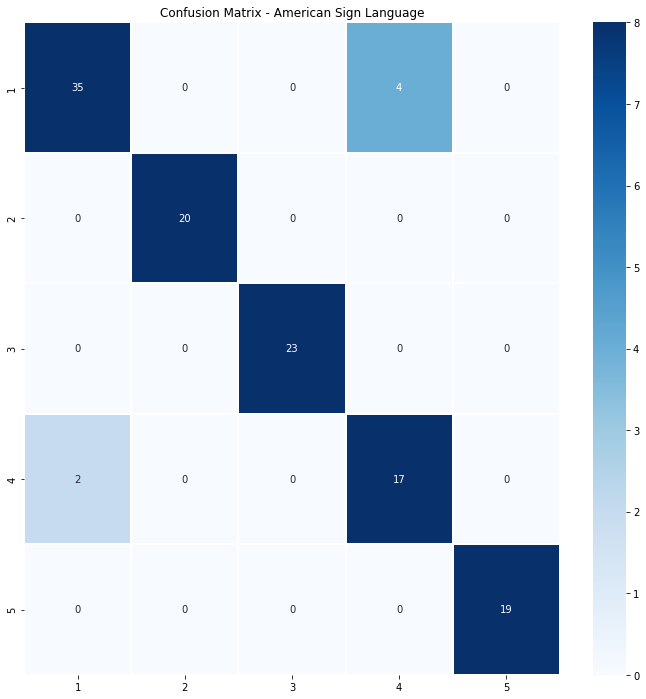

In [23]:
labels = sorted(list(set(df['Output'])))
labels = [x for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [25]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)